# Structural modeling and experiment planning

What are the accessible structural details of a given system by phase measurements? How to perform data acquisition? Identifying proper experimental conditions is fundamental for successfully exploiting the X-ray dynamical diffraction (in its current conception).

Our approach for identifying those suitable multiple-diffraction cases is by elaborating structural models and comparing their structure factor phases. So, this step-by-step tutorial will show you how to use **pyddt** to perform these tasks.

## CeFe$_{4}$P$_{12}$

For illustrative purposes, let's consider the filled skutterudite CeFe$_{4}$P$_{12}$ and search for suitable experimental conditions to resolve the Ce oxidation state. Download its CIF on [Materials Project mp-16272](https://materialsproject.org/materials/mp-16272/).

This tutorial aims to show the experiment planning performed by Morelhão, S. et al. during the investigation of vibrational dynamics of filled skutterudites. See [Phonon scattering mechanism in thermoelectric materials revised via resonant x-ray dynamical diffraction](https://link.springer.com/article/10.1557/mrc.2020.37) for a detailed reference.

### 0. Importing packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = '14'

import sys
sys.path.append('/home/rafaela/doutorado/pyddt')

import pyddt

## 1. Structural modelling

The structural modeling within **pyddt** is based on the `Structure` class. 

So, in a few words, it follows what we will do in this section: after converting the CIF into a *.in* file, we will instantiate a structure. Then, carry out the desired changes in the unit cell (replace the atoms with ions, vary their B-factors) and save the resultant models.

### 1.1 Converting CIF into .in file

In [2]:
pyddt.to_in('Ce(FeP3)4.cif')

### 1.2 Structure object

It's easy to generate a `structure` object from the *.in* file.

In [3]:
cfp = pyddt.Structure('Ce(FeP3)4.in')

Let's check the current oxidation states and B-factors.

In [4]:
cfp.atoms

array(['Ce', 'Ce', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'Fe', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P'], dtype='<U32')

In [5]:
cfp.bfactors

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Now, we will generate two simple models from this `structure` object: one presenting Ce$^{3+}$ and the other Ce$^{4+}$. Both including Fe$^{2+}$, P$^{1-}$, and all atomic displacements equal to 0.1 $\mathring{A}$ $\rightarrow$ $B = 0.7896\;\mathring{A}$$^{2}$.

#### 1.2.1 Varying the B-factors

Let's start by changing all B-factors. 

In [6]:
cfp.replace_bfactor(':', 0.7896)

The first argument is the indices of B-factors to be replaced, while the second is the new value. In this case, we replace simultaneously all B-factors using `':'`. As a sanity check, verify the current values.

In [7]:
cfp.bfactors

array([0.7896, 0.7896, 0.7896, 0.7896, 0.7896, 0.7896, 0.7896, 0.7896,
       0.7896, 0.7896, 0.7896, 0.7896, 0.7896, 0.7896, 0.7896, 0.7896,
       0.7896, 0.7896, 0.7896, 0.7896, 0.7896, 0.7896, 0.7896, 0.7896,
       0.7896, 0.7896, 0.7896, 0.7896, 0.7896, 0.7896, 0.7896, 0.7896,
       0.7896, 0.7896])

#### 1.2.2 Replacing Fe and P atoms

The procedure for replacing the atoms with the desired ions is very similar.

In [8]:
cfp.replace_ion('Fe', 'Fe2+')
cfp.replace_ion('P', 'P1-')

We said for **pyddt** to replace all `'Fe'` atoms with `'Fe2+'` ions, and the corresponding for phosphorous. 

In [9]:
cfp.atoms  # Sanity check

array(['Ce', 'Ce', 'Fe2+', 'Fe2+', 'Fe2+', 'Fe2+', 'Fe2+', 'Fe2+', 'Fe2+',
       'Fe2+', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-',
       'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-',
       'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-'], dtype='<U32')

#### 1.2.3 Ce oxidation state

Now, we will change the Ce atom to Ce$^{3+}$ and save this structural model.

In [10]:
cfp.replace_ion('Ce', 'Ce3+')

In [11]:
cfp.atoms  # Sanity check

array(['Ce3+', 'Ce3+', 'Fe2+', 'Fe2+', 'Fe2+', 'Fe2+', 'Fe2+', 'Fe2+',
       'Fe2+', 'Fe2+', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-',
       'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-',
       'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-'],
      dtype='<U32')

In [12]:
cfp.save_infile('ce3.in')

The structural model `ce3.in` is saved in the current folder. Check this file. Are the ions and B-factors correct? If not, review this tutorial from section 1.2.

By the end, replaces the Ce$^{3+}$ ion with Ce$^{4+}$ and save the other structural model.

In [13]:
cfp.replace_ion('Ce3+', 'Ce4+')

In [14]:
cfp.atoms  # Sanity check

array(['Ce4+', 'Ce4+', 'Fe2+', 'Fe2+', 'Fe2+', 'Fe2+', 'Fe2+', 'Fe2+',
       'Fe2+', 'Fe2+', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-',
       'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-',
       'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-'],
      dtype='<U32')

In [15]:
cfp.save_infile('ce4.in')

Again, it's highly recommend that you check the saved model before proceeding. 

## 2. Experiment planning

We have generated two structural models by changing the Ce valence from 3+ to 4+. Now, it is necessary to search for structure factors with phases susceptible to this change in the models. 

The function `pyddt.phase()` finds the susceptible cases from the structure factor list of both models. As we see in the previous tutorial, the structure factor list is obtained after creating `crystal` objects.

### 2.1 Crystal objects

In [16]:
ce3 = pyddt.Crystal('ce3.in')
ce4 = pyddt.Crystal('ce4.in')

Check if the created objects have the expected valence.

In [17]:
ce3.structure.atoms

array(['Ce3+', 'Ce3+', 'Fe2+', 'Fe2+', 'Fe2+', 'Fe2+', 'Fe2+', 'Fe2+',
       'Fe2+', 'Fe2+', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-',
       'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-',
       'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-'],
      dtype='<U32')

In [18]:
ce4.structure.atoms

array(['Ce4+', 'Ce4+', 'Fe2+', 'Fe2+', 'Fe2+', 'Fe2+', 'Fe2+', 'Fe2+',
       'Fe2+', 'Fe2+', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-',
       'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-',
       'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-', 'P1-'],
      dtype='<U32')

### 2.2 Phase comparison

For now, let's consider X-rays of 7100 eV and perform the comparison of structure factor phases. 

In [19]:
E = 7100  # eV

In [ ]:
pyddt.phase(ce3.diffraction(E), ce4.diffraction(E), 1)

![pyddt_t2_1](https://user-images.githubusercontent.com/106104347/187934482-f32cb04b-e819-4296-94dc-8f1820d6e054.png)

The result is an interactive plot with the hover text presenting the Miller indices. All plotted information was saved in the current folder (filename displayed on the screen).

The vertical axis presents the phase difference, so 002 is the best reflection for phase measurements.

### 2.2 Optimum resonance condition

In the previous tutorial, we calculated the Fe resonance amplitude near its absorption edge, and characteristic "jumps" are noted. How does it influence the structure factor phase? 

To check this, let's calculate the phase of 002 as a function of energy.

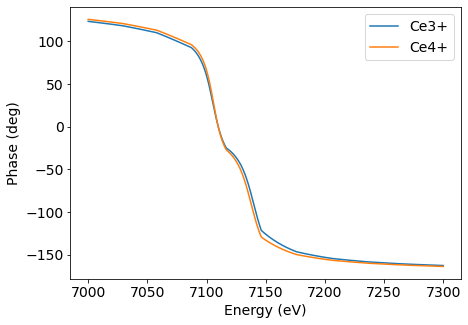

In [20]:
E = np.linspace(7000, 7300, 2000)  # eV

fig = plt.figure(figsize=(7, 5))

plt.plot(E, np.angle(ce3.Fhkl(E, [0, 0, 2]))*180/np.pi, label='Ce3+')
plt.plot(E, np.angle(ce4.Fhkl(E, [0, 0, 2]))*180/np.pi, label='Ce4+')

plt.xlabel('Energy (eV)')
plt.ylabel('Phase (deg)')

plt.legend()
plt.show()

Although the phase difference between the structural models is less than 10 degrees, the phase shift can be at 180° for just 100 eV of variation in the X-ray energy. This phenomenon allowed a multi-wavelength use of X-ray dynamical diffraction exploited by [Morelhão, S. et al](https://link.springer.com/article/10.1557/mrc.2020.37).

### 2.3 Phase triplets

Until now, we selected the 002 as the primary reflection and might acquire data using X-rays in the range of 7100 and 7200 eV. 

Lastly, check the three-beam cases predicted to show opposite profile asymmetries on each model structure for a fixed energy.

In [ ]:
E = 7150
pyddt.triplet(ce3.diffraction(E), ce4.diffraction(E), [0, 0, 2])

![pyddt_t2_2](https://user-images.githubusercontent.com/106104347/187935676-81303ffe-6583-427a-b885-d1ad713afd0f.png)

Again, the plotted information was saved in the current folder (filenames displayed on the screen).

----

## Summary

The first part of this tutorial has shown some tools for structural modeling. However, the functions for appending or deleting atoms and changing their occupancy numbers weren't covered, as well the `visualizer_in` method. Please, check the [API documentation](../api.rst) for more details. On the other hand, the second part covered all functions usually used for experiment planning. If you develop new tools using **pyddt** classes, please contribute to the project on [GitHub](https://github.com/rafaela-felix/pyddt).

In the last tutorial, we will analyze two Renninger scans and indicate how compatibility analysis is carried out using **pyddt**.